# Interpretable Models

Every machine learning model is interpretable in some way or another, however, simpler models are much easier to interpret. Many top performing models, such as Artificial Neural Networks, Convolutional Neural Networks, and ensemble tree based models are not readily interpretable. Their lack of interpretability can discourage scientists from using them, which limits the tool set of a scientific investigator. But, there are also less popular but equally well performing models that are interpretable out there. We will discuss two types of models, a Bayesian Linear Regression and a Gaussian Process Regression, that both have analytical solutions for the conditional probability of our target variable. 

<a id='_linear_regressions'></a>
## Linear Regression

First, let's start with how a linear regression operates. 

A linear regression is one of the most interpretable machine learning models to implement. The approach to approximate an unknown function, $f(x)$, using a linear regression assumes that $f(x)$ is a linear combination of the input features, $X$, such that
$$f(x,w)= \sum^N_{i=1} w_i x_i $$
Equation 1

where $w$ is the unknown parameter known as the weight vector, $N$ is the number of predictors, and $x$ are the input features. A more familiar writing of the above equation can look like: 
$$ y=w_0+w_1 x_1+⋯+w_N x_N $$
Equation 2

This is called a parametric machine learning model because we assume the form of the function we are trying to approximate, a linear form. The one parameter an ordinary linear model needs to learn is the weight vector $w$. This vector determines the influence of each of the input predictors, in our case environmental variables, that influence the target, vertical accretion. To solve for the optimal weight vector, we need to take the most likely set of maximum likelihood of the target $y$ given a linear combination of $w X$. To do this, we first write the likelihood function generally

$$p(y | X, w, \beta) = \prod \mathcal{N}(y_n | w^T x_n , \beta^-{1})$$
Equation 3

Where $\beta$ is the noise associated with the target. Now, given our training data we want to find the $w$ parameter that maximizes this equation, the likelihood of $y$. To do this, we need to take teh logarithm of the equation, then the derivative, then set the equation to zero, and solve for $w$.

Then solving for $w$ we get

$$w = (X^T X)^{-1} X^T y$$
Equation 4

This is the learned optimal set of the weight vector and is obtained from the Gauss-Markov Theorem.


## Regularized Linear Regression

Both a classic linear regression and a Bayesian linear regression can be modified to mitigate the effects of overfitting to the training data. Overfitting is when our model places undue importance to certain features, commonly occurring when given many input features. The effect is that we perfectly fit to our training data, making our model perform poorly when given new data. A visualization can be seen below.

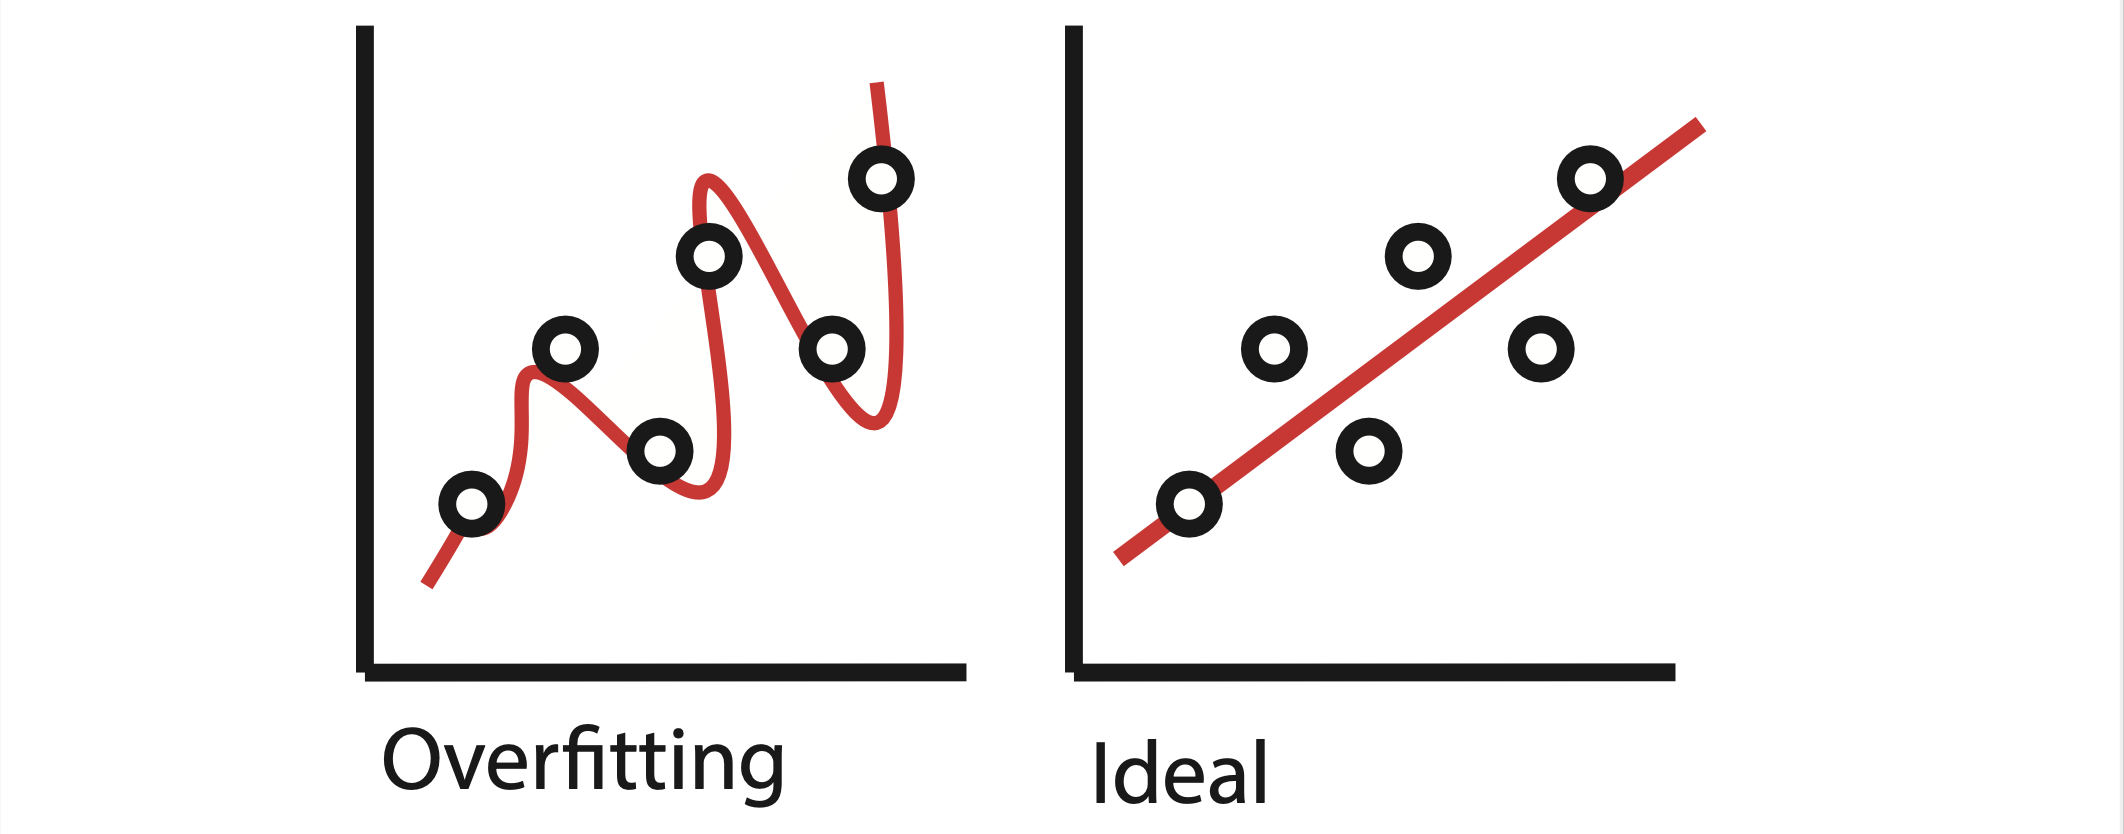

To combat overfitting, a regularization term is employed. The term can either be an L1 or L2 regularization term and it is subsequently added to the sum of squares error equation $\sum_{i=1}^{N} (y_i - w^T x_i)^2$, such that the new total error equation becomes either

L1 regularized sum of square errors:
$$ \sum_{i=1}^{N} (y_i - w^T x_i)^2 + \frac{\lambda}{2}|w| $$
Equation 5

L2 regularized sum of square errors:
$$ \sum_{i=1}^{N} (y_i - w^T x_i)^2 + \frac{\lambda}{2} w^T w $$
Equation 6

As we can see, $\lambda$ is an important term determining how much to penalize large weight coefficients. In a Frequentist framework this term has to be defined explicitly by the investigator or through a cross validation technique that tests various possible values for $\lambda$ and selects the value which minimizes testing error. Cross validation is a machine learning model evaluation method in which a dataset is split into $K$ folds, then the model is trained on $K-1$ folds, then tested on the remaining one fold where some error metric is computed. This is then repeated $K$ times, alternating the fold in which we test on, and the calculated model errors are then averaged. A schematic is shown below

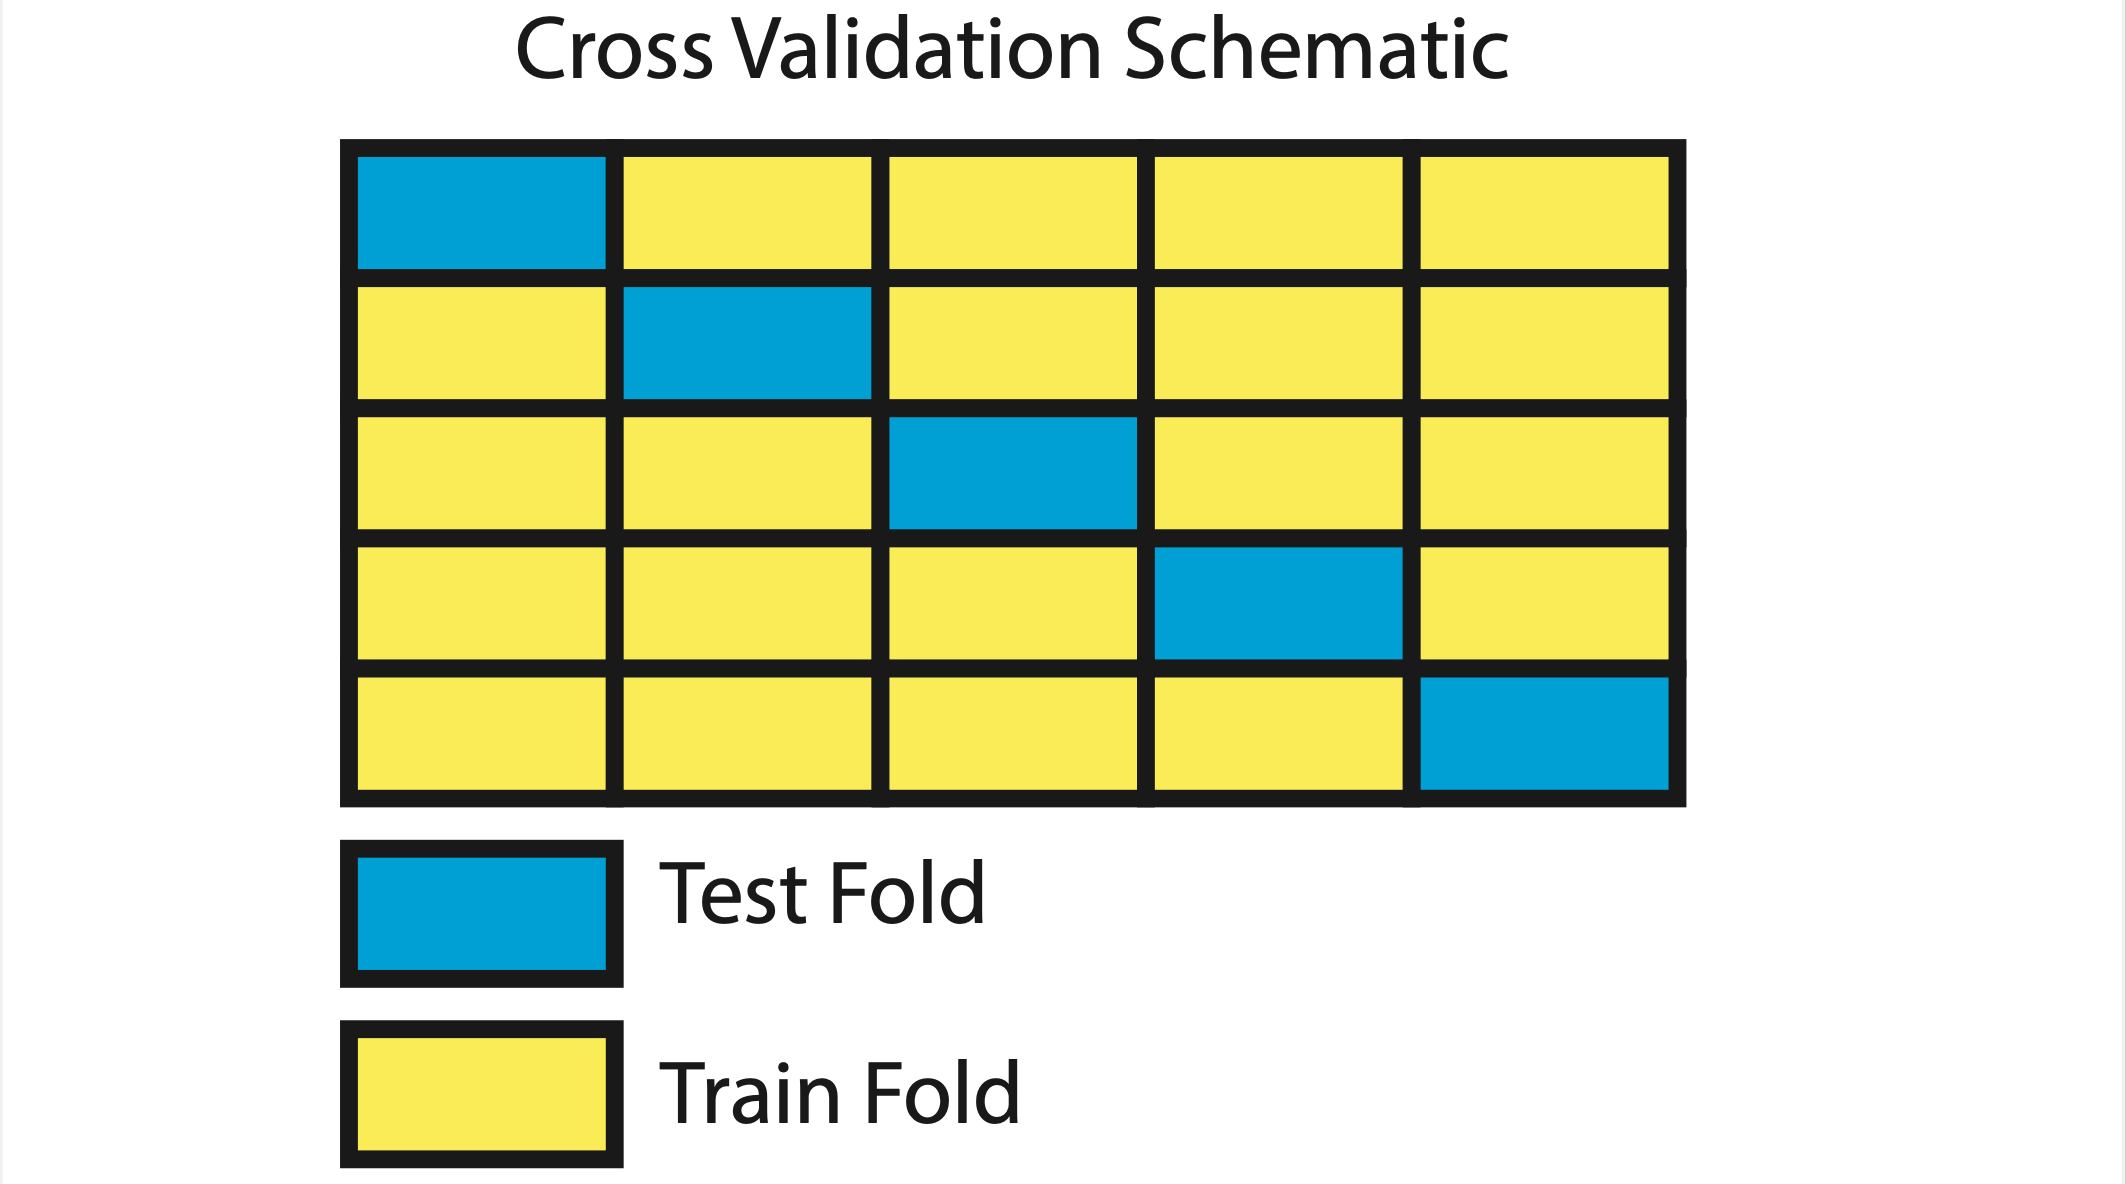

When a proper $\lambda$ value is found, we then apply the same process for the solution of the best weight vector as we did for the ordinary linear regression to get:

$$w = (\lambda I + X^T X)^{-1} X^T y$$
Equation 7

This then becomes the optimal weight vector for a regularized linear regression.


<a id='_BLR'></a>
## Bayesian Linear Regression (BLR) 

A Bayesian linear regression is simply a reformulation of the classic, Frequentist linear regression explained above from a Bayesian perspective. The only difference is that the Bayesian perspective deals with probabilities in the form of distributions rather than point estimations. Therefore, both the Frequentist and Bayesian treatment of linear regression have the same tractable solution to the conditional probability of our target variable (Bishop 2006). This is preferable from a scientific perspective when making conclusions from the learned weight parameters and building confidence in our model’s predictions. 

To find the weight vector from a Bayesian perspective we take the log derivative of the posterior distribution of $w$, which is the product of the prior and the likelihood functions over $w$. The log of the posterior follows similarly to the regularized sum of square errors equations (Bishop 2006). 
$$ \ln p(w|X, y) = -\frac{\beta}{2} \sum_{i=1}^N(y_i - w^T x_i)^2 - \frac{\alpha}{2} w^T w $$ 
Equation 8

Where $\beta$ is the noise parameter over y, the target variable from the train set, and $\alpha$ is the precision, or noise, over the weight parameter. $X$ is the data in the design matrix. We then maximize the log posterior with respect to $w$ by taking the derivative, setting to zero, and solving for $w$ to find the most likely $w$ vector. 

From further inspection of the equation, we see that $\alpha / \beta$ act the same as $\lambda$ in the L2 regularized solution. This is where an advantage of the Bayesian treatment arises because all we need to do is find the values for $\alpha$ and $\beta$ to get the regularization parameter $\lambda$. This can be done through a technique called *Empirical Bayes* with an iterative algorithm. Another advantage of the Bayesian treatment is that, by dealing with distributions, model uncertainty quantification can be readily attained through the standard deviation of the predictive distribution and from the eigen decomposition of matrix of feature inputs (Bishop 2006, MacKay 1992).

## Bayesian and Frequenist Regularized Linear Regression have the same solution

Just to solidify the notion that the both an L2 regularized linear regression for a Bayesian and Frequentist persepctive have the same solution, we are going to implement both types of L2 linear regression using scikit-learn. In scikit-learn's library, the Ridge regression is the Frequentist L2 regularized linear regression and the Bayesian Ridge regression is the Bayesian L2 regularized linear regression. In the below cells we will implement meant them both.

In [15]:
# Testing whether the scikit learn ridge and bayesian ridge learn the same paramters
olsr = linear_model.Ridge()
br = linear_model.BayesianRidge()

# We need to hyperparamter tune the OLS Ridge because there is no way to solve for the regularization parameter analytically
searcher = GridSearchCV(olsr, {'alpha': np.arange(1, 300, 2)}, scoring="neg_root_mean_squared_error")
searcher.fit(data[['Tidal Amplitude (cm)', 'Avg. Flood Depth (cm)']], target)
best_olsr = searcher.best_estimator_
print("Best regularizor by Cross Validation: ", searcher.best_params_)
print("Learned Weight Coefficents: ", best_olsr.coef_)

Best regularizor by Cross Validation:  {'alpha': 1}
Learned Weight Coefficents:  [3.90306258 1.13199355]


In [16]:
# fit the br and see if it is the same
br.fit(data[['Tidal Amplitude (cm)', 'Avg. Flood Depth (cm)']], target)
print("Learned Regularizor: ", br.lambda_ / br.alpha_)
print("Learned Weight Coefficent: ", br.coef_)

Learned Regularizor:  3.433346530743498
Learned Weight Coefficent:  [3.8591872  1.10676778]


From the weight coefficients and learned regularizers, we can see that the two methods produce similar results. While the only difference arises from the learned regularization term. We are able to find the Bayesian Ridge Regression solves for a higher regularization term of 3.44 through the Empirical Bayes method, while the cross-validation of the OLS Ridge Regression finds an optimal regularization term value of 1. 

<a id='_GPR'></a>
# Applying a Nonlinear Model

## Gaussian Process Regression

The GPR begins with our desire to find an unknown function $f(x)$ that will help us predict our target variable $y$ with the addition of some Gaussian distributed noise, $\epsilon$, such that:
$$ y = f(x)+ \epsilon $$
Equation 11

The BLR approach falls short when the relationship between our input and output variables is nonlinear, due to defining our unknown function as a linear combination of the predictors governed by the learned weight parameter, $w$. A Gaussian Process Regression (GPR) overcomes the limited flexibility of the BLR by projecting the inputs into an infinitely high dimensional space using a set of basis functions which allow us to overcome the assumption of linearity in a BLR (Rasmussen and Williams 2005). This makes GPR a powerful non-parametric machine learning tool that can capture the nonlinear dynamics and interactions of the input and output variables. 

The reasoning behind a GPR includes using a Gaussian Process to describe the distribution over all possible functions for a given sample $x_i$. Defined as a collection of random variables of which any finite set have a joint Gaussian distribution, a Gaussian process can be completely specified by its mean function, $m(x)$, and covariance function, $k(x,x')$ (Rasmussen and Williams 2005). Following Rasmussen and Williams 2005, with a known mean and covariance, we can write the prior distribution of all possible random unknown functions as:
$$ f(x)∼GP(m(x),k(x,x')) $$
Equation 12

An important choice for the investigator is choosing the covariance function, $k(⋅,⋅)$, for the GPR model that best describes our data. In broad sense, we expect similar samples to have similar outcomes and effects on the target variable and the covariance function is what defines the similarity between samples. After multiple trials, we deduce that a squared dot product covariance function fits our data best.  
$$ k(x,x' )=(x \cdot x' )^2+\delta$$
Equation 13

Where $\delta$ is the error associated with the target variable and $x$ and $x'$ are predictors.  

From a specified mean and covariance function, the computation of the conditional probability of our target is straight forward. Assuming a zero mean we can write:

$$\begin{bmatrix} y \\ f_* \end{bmatrix} = \mathcal{N} ( \begin{bmatrix} 0 \\ 0 \end{bmatrix} , \begin{bmatrix} (k(X,X)+σ^2I & k(X,X_*) \\ k(X_*,X) & k(X_*,X_*) \end{bmatrix} )$$
Equation 14

Where $k(X,X)$ is the covariance between training samples, $k(X_*,X_*)$ is the covariance between testing samples, $k(X_*,X)$ and $k(X,X_*)$ are the covariances between training and testing samples, $y$ is the target variable, $f_*$ is the learned function, and $\sigma^2$ is the noise associated with the target variable (Rasmussen and Williams 2005). Utilizing the rules for the combination of partitioned Gaussians we can write the mean and covariance for the predictive distribution as
$$ m(x)=k(X_*,X)(k(X,X)+ σ^2 I)^{-1} y $$
Equation 15

$$ k(x,x') = k(X_*,X_* ) - k(X_*, X)(k(X,X)+ σ^2 I)^{-1} k(X,X_*) $$
Equation 16
